# Microsoft Video Studio Analysis

## 1. Business Problem

Microsoft recognizes the trend of major companies producing their own original video content and wants to join in. However, as they lack experience in movie creation, they have established a new movie studio. You've been tasked to explore what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

#### Analysis objectives


1. Show the relationship between highly rated films and the budget required. 
2. Genre which is most produced.  
3. Genre that is highly rated. 
4. Studios that are highly recommended for production. 

## 2. Importing the relevant modules

In [1540]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import requests


from collections import Counter
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

## 3. Exploring the data

First we explore the data that we have. These are all the movie data we could collect. 

In [1541]:
# loading the movies csv file.

def file_open(path):
    with open(path) as j:
        return pd.read_csv(j)
    
movies = file_open('/home/lee/Desktop/project_Phase 1/learn-co-curriculum dsc-phase-1-project master zippedData/uncompressed/tmdb.movies.csv')

movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


As seen from the table, the genre_ids column is in a list of integers. Therefore, we have to get the respective id names for easier analaysis. Using the API from the https://developers.themoviedb.org/3/genres/get-movie-list website, we are able to find the respective names to the IDs'.

In [1542]:
url = "https://api.themoviedb.org/3/genre/movie/list?api_key=8fd90dd05e7398ba54d95857924fdad9&language=en-US"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

print(response.text)

{"genres":[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]}


In [1543]:
response.json().keys()

dict_keys(['genres'])

Previewing the values stored in the list.

In [1544]:
for key in response.json().keys():
    print(key)
    value = response.json()[key] #Use standard dictionary formatting
    print(type(value)) #What type is it?

genres
<class 'list'>


In [1545]:
response.json()['genres'][:]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 80, 'name': 'Crime'},
 {'id': 99, 'name': 'Documentary'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10751, 'name': 'Family'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 36, 'name': 'History'},
 {'id': 27, 'name': 'Horror'},
 {'id': 10402, 'name': 'Music'},
 {'id': 9648, 'name': 'Mystery'},
 {'id': 10749, 'name': 'Romance'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 10770, 'name': 'TV Movie'},
 {'id': 53, 'name': 'Thriller'},
 {'id': 10752, 'name': 'War'},
 {'id': 37, 'name': 'Western'}]

Creating a data frame from the list of genres that we got. 

In [1546]:
genreId_names = pd.DataFrame.from_dict(response.json()['genres'])

genreId_names.rename(columns={'id':'genre_ids'}, inplace=True)
genreId_names.head(20)

,genre_ids,name
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


The movie gross.

In [1547]:
movie_gross = file_open('/home/lee/Desktop/project_Phase 1/learn-co-curriculum dsc-phase-1-project master zippedData/uncompressed/bom.movie_gross.csv')

movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


These are the budgets for the various movies.

In [1548]:
# loading the various budgets from the csv file.

budgets = file_open('/home/lee/Desktop/project_Phase 1/learn-co-curriculum dsc-phase-1-project master zippedData/uncompressed/tn.movie_budgets.csv')

budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


We still need to know how long each film took, hence we nee the file for that.

In [1549]:
# loading the basics csv file that has got the run time in minutes.

time = file_open('/home/lee/Desktop/project_Phase 1/learn-co-curriculum dsc-phase-1-project master zippedData/uncompressed/title.basics.csv')

time

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


Data in table files.

## 4. Working on the datasets

### Finding the null values in all the files. 

In [1550]:
movies.isnull().any()

Unnamed: 0           False
genre_ids            False
id                   False
original_language    False
original_title       False
popularity           False
release_date         False
title                False
vote_average         False
vote_count           False
dtype: bool

In [1551]:
movie_gross.isnull().any()

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [1552]:
gross_null = movie_gross.isnull().sum()
gross_null

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Percentage of missing data on the movie_gross file. 

In [1553]:
per_missing = gross_null * 100 / len(movie_gross)
per_missing 

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

Since the movie_gross file has almost half the data missing, it is better to use the budgets file that has no missing data. Using the worldwide gross we could calculate for the foreign gross seen in the movie_gross file. 


In [1554]:
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [1555]:
# Cleaning the three columns

cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

budgets1 = budgets.replace({'\$': '', ',': ''}, regex=True)

budgets1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,Dec 18 2009,Avatar,425000000,760507625,2776345279
1,2,May 20 2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,Jun 7 2019,Dark Phoenix,350000000,42762350,149762350
3,4,May 1 2015,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,Dec 15 2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,Dec 31 2018,Red 11,7000,0,0
5778,79,Apr 2 1999,Following,6000,48482,240495
5779,80,Jul 13 2005,Return to the Land of Wonders,5000,1338,1338
5780,81,Sep 29 2015,A Plague So Pleasant,1400,0,0


In [1556]:
# setting the columns to integer type for calculations later

budgets2  = budgets1.astype({'production_budget':'int', 'domestic_gross':'int', 'worldwide_gross':'int'})

### Finding duplicates in your dataset.

In [1557]:
movies.duplicated().any()

False

In [1558]:
budgets_dup = budgets2.duplicated().sum()

In [1559]:
print(f"The cleaned data has {budgets_dup} duplicates")

The cleaned data has 0 duplicates


In [1560]:
# Dropping the duplicates and renaming the movie column in the budgets file. 

new_budgets = budgets2.drop_duplicates()

new_budgets.rename(columns={'movie':'original_title'}, inplace=True)

new_budgets

,id,release_date,original_title,production_budget,domestic_gross,worldwide_gross
0,1,Dec 18 2009,Avatar,425000000,760507625,2776345279
1,2,May 20 2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,Jun 7 2019,Dark Phoenix,350000000,42762350,149762350
3,4,May 1 2015,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,Dec 15 2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,Dec 31 2018,Red 11,7000,0,0
5778,79,Apr 2 1999,Following,6000,48482,240495
5779,80,Jul 13 2005,Return to the Land of Wonders,5000,1338,1338
5780,81,Sep 29 2015,A Plague So Pleasant,1400,0,0


In [1561]:
new_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   original_title     5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


### Overall statistics of your dataset.

In [1562]:
movies.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [1563]:
new_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


### Merging the movies, time, gross and new_budgets dataset

In [1564]:
new_budgets.columns

Index(['id', 'release_date', 'original_title', 'production_budget',
       'domestic_gross', 'worldwide_gross'],
      dtype='object')

In [1565]:
# Before merge the columns lets remove the dupicated columns.

new_budgets = new_budgets.drop(['id', 'release_date'], axis=1)

In [1566]:
# Merging the movies and the budgets column.

movie_ds = pd.merge(movies, new_budgets, on='original_title', how='left')

movie_ds

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,NaN,NaN,NaN
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,165000000.0,217581232.0,494870992.0
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,170000000.0,312433331.0,621156389.0
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,30000000.0,191796233.0,364545516.0
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,160000000.0,292576195.0,835524642.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26591,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,NaN,NaN,NaN
26592,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,NaN,NaN,NaN
26593,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,NaN,NaN,NaN
26594,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,NaN,NaN,NaN


In [1567]:
movie_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26596 entries, 0 to 26595
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26596 non-null  int64  
 1   genre_ids          26596 non-null  object 
 2   id                 26596 non-null  int64  
 3   original_language  26596 non-null  object 
 4   original_title     26596 non-null  object 
 5   popularity         26596 non-null  float64
 6   release_date       26596 non-null  object 
 7   title              26596 non-null  object 
 8   vote_average       26596 non-null  float64
 9   vote_count         26596 non-null  int64  
 10  production_budget  2293 non-null   float64
 11  domestic_gross     2293 non-null   float64
 12  worldwide_gross    2293 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.6+ MB


In [1568]:
# Removing the duplicated columns in the time dataset so as to merge it.

time.columns

time = time.drop(['tconst', 'primary_title'], axis=1)

In [1569]:
# Merging the time column with the movie_ds dataset.

movie_ds = pd.merge(movie_ds, time, on='original_title', how='inner')

movie_ds

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,NaN,NaN,NaN,2010,146.0,"Adventure,Fantasy,Mystery"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,165000000.0,217581232.0,494870992.0,2010,98.0,"Action,Adventure,Animation"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,170000000.0,312433331.0,621156389.0,2010,124.0,"Action,Adventure,Sci-Fi"
3,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,160000000.0,292576195.0,835524642.0,2010,148.0,"Action,Adventure,Sci-Fi"
4,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,95000000.0,88768303.0,223050874.0,2010,118.0,"Adventure,Family,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21490,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,NaN,NaN,NaN,2014,80.0,"Documentary,History,News"
21491,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,NaN,NaN,NaN,2018,85.0,"Action,Adventure,Fantasy"
21492,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,NaN,NaN,NaN,2017,NaN,Adventure
21493,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,NaN,NaN,NaN,2016,79.0,Adventure


In [1570]:
# Checking the column 

movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [1571]:
# Removing the duplicated columns

movie_gross = movie_gross.drop(['domestic_gross', 'year'], axis=1)

In [1572]:
# Renaming the movie_gross csv title with the original title

movie_gross.rename(columns={'title':'original_title'}, inplace=True)

movie_gross.columns

Index(['original_title', 'studio', 'foreign_gross'], dtype='object')

In [1573]:
# merging the movie gross with the movie_ds dataset

movie_ds = pd.merge(movie_ds, movie_gross, on='original_title', how='inner')

In [1574]:
movie_ds.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'production_budget', 'domestic_gross', 'worldwide_gross', 'start_year',
       'runtime_minutes', 'genres', 'studio', 'foreign_gross'],
      dtype='object')

In [1575]:
movie_ds.isna().any()

Unnamed: 0           False
genre_ids            False
id                   False
original_language    False
original_title       False
popularity           False
release_date         False
title                False
vote_average         False
vote_count           False
production_budget     True
domestic_gross        True
worldwide_gross       True
start_year           False
runtime_minutes       True
genres                True
studio               False
foreign_gross         True
dtype: bool

In [1576]:
# Checking for  duplicated values.

movie_ds.duplicated().any()

True

In [1577]:
# Removing the duplicates.

movie_ds =  movie_ds.drop_duplicates()

### Getting the revenue

Revenue is equal to the worldwide gross subtracted from the production budget. 

In [1578]:
# Finding the revenue of the movies produced

movie_ds['revenue'] = movie_ds['worldwide_gross'] - movie_ds['production_budget']

In [1579]:
# Sorting the table with revenue to see the movie with the most revenue.

movie_ds = movie_ds.sort_values('revenue', ascending=False)


# movie_ds.set_index('genre_ids')

In [1624]:
movie_ds.head(5)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres,studio,foreign_gross,revenue
2989,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,300000000.0,678815482.0,2.048134e+09,2018,149.0,"Action,Adventure,Sci-Fi",BV,"1,369.5",1.748134e+09
2007,14193,"[28, 12, 878, 53]",135397,en,Jurassic World,20.709,2015-06-12,Jurassic World,6.6,14056,215000000.0,652270625.0,1.648855e+09,2015,124.0,"Action,Adventure,Sci-Fi",Uni.,"1,019.4",1.433855e+09
709,3444,"[28, 16]",86841,en,Black Panther,2.058,2011-01-18,Black Panther,5.1,11,200000000.0,700059566.0,1.348258e+09,2018,134.0,"Action,Adventure,Sci-Fi",BV,646900000,1.148258e+09
710,23817,"[28, 12, 14, 878]",284054,en,Black Panther,44.140,2018-02-16,Black Panther,7.4,12365,200000000.0,700059566.0,1.348258e+09,2018,134.0,"Action,Adventure,Sci-Fi",BV,646900000,1.148258e+09
3000,23829,"[28, 12, 878]",351286,en,Jurassic World: Fallen Kingdom,34.958,2018-06-22,Jurassic World: Fallen Kingdom,6.5,5995,170000000.0,417719760.0,1.305773e+09,2018,128.0,"Action,Adventure,Sci-Fi",Uni.,891800000,1.135773e+09


In [1626]:
movie_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3141 entries, 2989 to 3142
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3141 non-null   int64  
 1   genre_ids          3141 non-null   object 
 2   id                 3141 non-null   int64  
 3   original_language  3141 non-null   object 
 4   original_title     3141 non-null   object 
 5   popularity         3141 non-null   float64
 6   release_date       3141 non-null   object 
 7   title              3141 non-null   object 
 8   vote_average       3141 non-null   float64
 9   vote_count         3141 non-null   int64  
 10  production_budget  1926 non-null   float64
 11  domestic_gross     1926 non-null   float64
 12  worldwide_gross    1926 non-null   float64
 13  start_year         3141 non-null   int64  
 14  runtime_minutes    2948 non-null   float64
 15  genres             3091 non-null   object 
 16  studio             3141 no

In [1581]:
movie_ds.duplicated().any()

False

### Finding the names to the genres

In [1582]:
#convert the list genre_ids columns to strings.

movie_ds['genre_ids'] = movie_ds['genre_ids'].astype(str)

# Cleaning it from the square brackets and the extra space.

movie_ds['genre_ids'] =  movie_ds['genre_ids'].apply(lambda x: x.replace('[','').replace(']','').replace(" ","")) 

# Splitting the genre column using the commas.

movie_ds['genre_ids'] = movie_ds['genre_ids'].apply(lambda x: x.split(','))


movie_ds['genre_ids']

2989         [12, 28, 14]
2007    [28, 12, 878, 53]
709              [28, 16]
710     [28, 12, 14, 878]
3000        [28, 12, 878]
              ...        
3137       [10402, 10749]
3138             [80, 18]
3139                 [18]
3140                 [99]
3142                 [35]
Name: genre_ids, Length: 3141, dtype: object

In [1584]:
# Finding the unique genre_ids.

unique_list = []

for item in one_d:
    if item not in unique_list:
        unique_list.append(item)
        
len(unique_list)
unique_list

['12',
 '28',
 '14',
 '878',
 '53',
 '16',
 '10751',
 '35',
 '80',
 '18',
 '10402',
 '10752',
 '10749',
 '27',
 '99',
 '9648',
 '37',
 '36',
 '10770',
 '']

In [1585]:
# Finding the number of each genre of movies produced

genre_prod = Counter(one_d)
genre_prod

Counter({'12': 403,
         '28': 519,
         '14': 240,
         '878': 255,
         '53': 814,
         '16': 135,
         '10751': 213,
         '35': 856,
         '80': 350,
         '18': 1672,
         '10402': 120,
         '10752': 68,
         '10749': 421,
         '27': 324,
         '99': 216,
         '9648': 283,
         '37': 31,
         '36': 131,
         '10770': 2,
         '': 71})

In [1586]:
# Creating a dataframe from the counter above.

genre_prod = pd.DataFrame.from_dict(genre_prod, orient='index').reset_index()

genre_prod

,index,0
0,12,403
1,28,519
2,14,240
3,878,255
4,53,814
5,16,135
6,10751,213
7,35,856
8,80,350
9,18,1672


In [1587]:
# Changing the name to the index column to genre_ids so as to later merge it.

genre_prod.rename(columns={'index':'genre_ids', 0:'movies_produced'}, inplace=True)

In [1588]:
# Droping the column that has no index.

genre_prod = genre_prod.drop(labels=19, axis=0)

In [1589]:
# Changing the type of the index column to string.

genre_prod = genre_prod.astype({'genre_ids':'int'})

In [1590]:
# Joining the genre_prod table with the genreId_names table to get the names to the various IDs.

genre_prod = pd.merge(genre_prod, genreId_names, on='genre_ids', how='inner')

genre_prod = genre_prod.sort_values('movies_produced', ascending=False)

genre_prod

,genre_ids,movies_produced,name
9,18,1672,Drama
7,35,856,Comedy
4,53,814,Thriller
1,28,519,Action
12,10749,421,Romance
0,12,403,Adventure
8,80,350,Crime
13,27,324,Horror
15,9648,283,Mystery
3,878,255,Science Fiction


### Finding the highly rated genres

In [1591]:
s = movie_ds['genres'].str.split(',').explode()
encoder = OneHotEncoder()
encoded = encoder.fit_transform(s.values[:, None])
genres_df = pd.DataFrame(encoded.toarray(), columns=np.ravel(encoder.categories_), dtype='int',) \
                .groupby(s.index) \
                .sum()

In [1592]:
genres_df

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,NaN
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3139,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3140,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3141,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1618]:
split_genre_df = pd.concat([movie_ds, genres_df], axis=1)

split_genre_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,NaN
2989,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,...,0,0,0,0,1,0,0,0,0,0
2007,14193,"[28, 12, 878, 53]",135397,en,Jurassic World,20.709,2015-06-12,Jurassic World,6.6,14056,...,0,0,0,0,1,0,0,0,0,0
709,3444,"[28, 16]",86841,en,Black Panther,2.058,2011-01-18,Black Panther,5.1,11,...,0,0,0,0,1,0,0,0,0,0
710,23817,"[28, 12, 14, 878]",284054,en,Black Panther,44.140,2018-02-16,Black Panther,7.4,12365,...,0,0,0,0,1,0,0,0,0,0
3000,23829,"[28, 12, 878]",351286,en,Jurassic World: Fallen Kingdom,34.958,2018-06-22,Jurassic World: Fallen Kingdom,6.5,5995,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,24565,"[10402, 10749]",457308,en,Heartbeats,6.127,2018-03-20,Heartbeats,6.9,69,...,0,0,0,0,0,0,0,0,0,0
3138,24760,"[80, 18]",477654,es,Museo,4.819,2018-09-14,Museo,6.5,37,...,0,0,0,0,0,0,0,0,0,0
3139,24916,[18],473262,it,"Nico, 1988",3.789,2018-07-04,"Nico, 1988",7.3,40,...,0,0,0,0,0,0,0,0,0,0
3140,25037,[99],465871,en,Maria by Callas,3.184,2018-11-02,Maria by Callas,7.6,11,...,0,0,0,0,0,0,0,0,0,0


In [1623]:
split_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3141 entries, 2989 to 3142
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3141 non-null   int64  
 1   genre_ids          3141 non-null   object 
 2   id                 3141 non-null   int64  
 3   original_language  3141 non-null   object 
 4   original_title     3141 non-null   object 
 5   popularity         3141 non-null   float64
 6   release_date       3141 non-null   object 
 7   title              3141 non-null   object 
 8   vote_average       3141 non-null   float64
 9   vote_count         3141 non-null   int64  
 10  production_budget  1926 non-null   float64
 11  domestic_gross     1926 non-null   float64
 12  worldwide_gross    1926 non-null   float64
 13  start_year         3141 non-null   int64  
 14  runtime_minutes    2948 non-null   float64
 15  genres             3091 non-null   object 
 16  studio             3141 no

In [1594]:
genres_df.sum()

Action          573
Adventure       445
Animation       135
Biography       340
Comedy          842
Crime           384
Documentary     312
Drama          1697
Family          117
Fantasy         159
History         124
Horror          338
Music            99
Musical          12
Mystery         232
News              3
Romance         399
Sci-Fi          158
Sport            70
Thriller        497
War              31
Western          22
NaN              50
dtype: int64

In [1595]:
# Setting the vote_average/ratings to integers so that we could group them. 

movie_ds1 = movie_ds.astype({'vote_average':'int'})

In [1596]:
genres_ratings = movie_ds.groupby('genres')['vote_average'].mean().sort_values(ascending=False).head(20)

genres_ratings

genres
Animation,Biography,Crime         8.200000
Adventure,Animation,Drama         8.100000
Documentary,History,War           8.100000
Biography,Drama,Musical           8.000000
Action,Biography,History          8.000000
Animation,Drama,Family            7.900000
Biography,Documentary,Thriller    7.900000
Adventure,Drama,Sci-Fi            7.866667
Comedy,Crime,Documentary          7.700000
Comedy,Musical,Romance            7.500000
Documentary,History               7.483333
Crime,Documentary                 7.400000
Drama,Fantasy,Music               7.400000
Biography,Crime,Documentary       7.400000
Documentary,Sport                 7.300000
Action,Comedy,Fantasy             7.300000
Adventure,Documentary,Sport       7.300000
Action,Horror,Thriller            7.275000
Documentary,War                   7.266667
Comedy,Documentary                7.233333
Name: vote_average, dtype: float64

### Highly rated studios

In [1597]:
movie_ds

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres,studio,foreign_gross,revenue
2989,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,300000000.0,678815482.0,2.048134e+09,2018,149.0,"Action,Adventure,Sci-Fi",BV,"1,369.5",1.748134e+09
2007,14193,"[28, 12, 878, 53]",135397,en,Jurassic World,20.709,2015-06-12,Jurassic World,6.6,14056,215000000.0,652270625.0,1.648855e+09,2015,124.0,"Action,Adventure,Sci-Fi",Uni.,"1,019.4",1.433855e+09
709,3444,"[28, 16]",86841,en,Black Panther,2.058,2011-01-18,Black Panther,5.1,11,200000000.0,700059566.0,1.348258e+09,2018,134.0,"Action,Adventure,Sci-Fi",BV,646900000,1.148258e+09
710,23817,"[28, 12, 14, 878]",284054,en,Black Panther,44.140,2018-02-16,Black Panther,7.4,12365,200000000.0,700059566.0,1.348258e+09,2018,134.0,"Action,Adventure,Sci-Fi",BV,646900000,1.148258e+09
3000,23829,"[28, 12, 878]",351286,en,Jurassic World: Fallen Kingdom,34.958,2018-06-22,Jurassic World: Fallen Kingdom,6.5,5995,170000000.0,417719760.0,1.305773e+09,2018,128.0,"Action,Adventure,Sci-Fi",Uni.,891800000,1.135773e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,24565,"[10402, 10749]",457308,en,Heartbeats,6.127,2018-03-20,Heartbeats,6.9,69,NaN,NaN,NaN,2017,107.0,"Comedy,Drama,Music",IFC,520000,NaN
3138,24760,"[80, 18]",477654,es,Museo,4.819,2018-09-14,Museo,6.5,37,NaN,NaN,NaN,2018,128.0,"Crime,Drama",Vita.,NaN,NaN
3139,24916,[18],473262,it,"Nico, 1988",3.789,2018-07-04,"Nico, 1988",7.3,40,NaN,NaN,NaN,2017,93.0,"Biography,Drama,Music",Magn.,NaN,NaN
3140,25037,[99],465871,en,Maria by Callas,3.184,2018-11-02,Maria by Callas,7.6,11,NaN,NaN,NaN,2017,119.0,"Biography,Documentary,Music",SPC,NaN,NaN


In [1598]:
# Setting the vote_average/ratings to integers so that we could group them. 

movie_ds1 = movie_ds.astype({'vote_average':'int'})

In [1599]:
# Getting ratings with the highest vote. 

movie_ds1.value_counts('vote_average')

vote_average
6     1350
5      839
7      626
4      135
8       98
3       38
10      29
1       13
0        9
2        3
9        1
Name: count, dtype: int64

In [1639]:
# Finding the highly rated studios.

studio_ratings = movie_ds1.groupby('studio')['vote_average'].mean().sort_values(ascending=False).head(30).to_dict()

studio_ratings

{'RF': 8.0,
 'Good Deed': 8.0,
 'Zeit.': 7.3125,
 'PDA': 7.142857142857143,
 'Cleopatra': 7.0,
 'Yash': 7.0,
 'U/P': 7.0,
 'SHO': 7.0,
 'SD': 7.0,
 'Orion': 7.0,
 'NGE': 7.0,
 'Lorb.': 7.0,
 'Jan.': 7.0,
 'IM': 7.0,
 'GrtIndia': 7.0,
 'GK': 7.0,
 '3D': 7.0,
 'Arth.': 7.0,
 'Greenwich': 6.75,
 'Neon': 6.75,
 'Orch.': 6.583333333333333,
 'Abr.': 6.571428571428571,
 'KL': 6.555555555555555,
 'Drft.': 6.538461538461538,
 'Affirm': 6.5,
 'BWP': 6.5,
 'Osci.': 6.5,
 'LD': 6.444444444444445,
 'PFR': 6.428571428571429,
 'Wein.': 6.402061855670103}

In [1640]:
#building a dataframe from the analysis above so as to graph them.

studio_ratings = pd.DataFrame.from_dict(studio_ratings, orient='index').reset_index()

studio_ratings

,index,0
0,RF,8.000000
1,Good Deed,8.000000
2,Zeit.,7.312500
3,PDA,7.142857
4,Cleopatra,7.000000
5,Yash,7.000000
6,U/P,7.000000
7,SHO,7.000000
8,SD,7.000000
9,Orion,7.000000


In [1641]:
# Finding the studio with the most production.

studio_30 = movie_ds['studio'].value_counts().head(30).to_dict()

studio_30

{'Uni.': 296,
 'Fox': 180,
 'WB': 153,
 'IFC': 142,
 'BV': 119,
 'Par.': 117,
 'LGF': 116,
 'SPC': 109,
 'Magn.': 107,
 'Wein.': 97,
 'FoxS': 94,
 'Sony': 93,
 'RAtt.': 81,
 'BG': 81,
 'WB (NL)': 69,
 'Focus': 67,
 'LG/S': 65,
 'Rela.': 63,
 'A24': 62,
 'ORF': 56,
 'STX': 35,
 'LGP': 35,
 'Strand': 32,
 'SGem': 32,
 'MNE': 30,
 'BST': 27,
 'TriS': 24,
 'Scre.': 24,
 'FCW': 24,
 'Cohen': 22}

In [1643]:
# Highly rated studios dataframe.

studio_30 = pd.DataFrame.from_dict(studio_30, orient='index').reset_index()

studio_30

,index,0
0,Uni.,296
1,Fox,180
2,WB,153
3,IFC,142
4,BV,119
5,Par.,117
6,LGF,116
7,SPC,109
8,Magn.,107
9,Wein.,97


In [1632]:
# Finding the studio with the most votes. 

studio_votes = movie_ds.groupby('studio')['vote_count'].mean().sort_values(ascending=False).head(30).to_dict()

studio_votes

{'BV': 4809.512605042017,
 'P/DW': 3378.1,
 'WB': 2884.1176470588234,
 'Par.': 2769.735042735043,
 'Fox': 2754.2055555555557,
 'Sony': 2714.3548387096776,
 'WB (NL)': 2530.086956521739,
 'Uni.': 2013.3817567567567,
 'LG/S': 1918.7076923076922,
 'TriS': 1893.5416666666667,
 'MGM': 1809.5,
 'LGF': 1784.155172413793,
 'Wein.': 1597.9690721649486,
 'U/P': 1594.0,
 'Focus': 1489.1194029850747,
 'SGem': 1428.40625,
 'FD': 1390.3,
 'FoxS': 1299.8085106382978,
 'Sum.': 1277.090909090909,
 'Neon': 1227.0,
 'Good Deed': 1200.0,
 'A24': 1195.0645161290322,
 'ORF': 1081.857142857143,
 'RTWC': 1074.0,
 'STX': 1066.2857142857142,
 'CBS': 1037.6923076923076,
 'Studio 8': 989.0,
 'Fathom': 879.0,
 'W/Dim.': 856.5384615384615,
 'Amazon': 831.0}

In [1633]:
# Building a dataframe from the data above.

studio_votes = pd.DataFrame.from_dict(studio_votes, orient='index').reset_index()

studio_votes

,index,0
0,BV,4809.512605
1,P/DW,3378.100000
2,WB,2884.117647
3,Par.,2769.735043
4,Fox,2754.205556
5,Sony,2714.354839
6,WB (NL),2530.086957
7,Uni.,2013.381757
8,LG/S,1918.707692
9,TriS,1893.541667


# 5. Visualization


In [1606]:
movie_ds.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'production_budget', 'domestic_gross', 'worldwide_gross', 'start_year',
       'runtime_minutes', 'genres', 'studio', 'foreign_gross', 'revenue'],
      dtype='object')

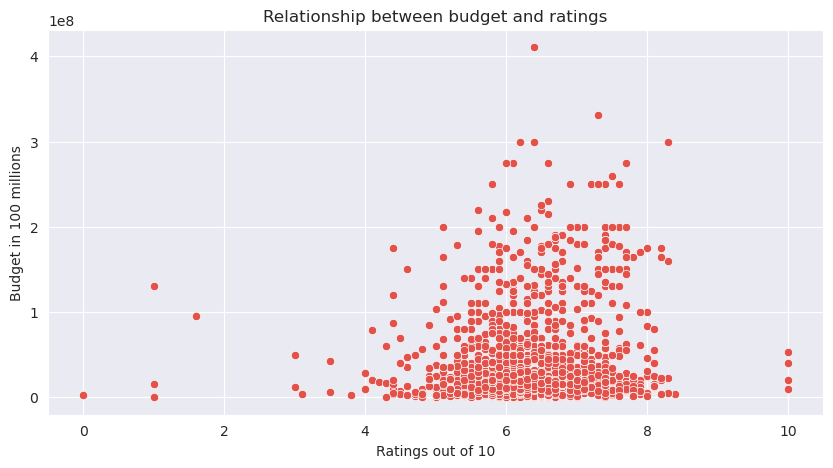

In [1607]:
# scatter plot to show relationship between budget and ratings.

sns.set_palette("Spectral")
sns.set_style("darkgrid")

plt.subplots(figsize=(10, 5))
sns.scatterplot(x='vote_average', 
                y='production_budget', data=movie_ds)
plt.title('Relationship between budget and ratings')
plt.ylabel('Budget in 100 millions')
plt.xlabel('Ratings out of 10');

In [1608]:
# Correlation

movie_ds['production_budget'].corr(movie_ds['vote_average'])

0.08876420564131744

This shows there is little to no correlation to the budget used and the ratings.

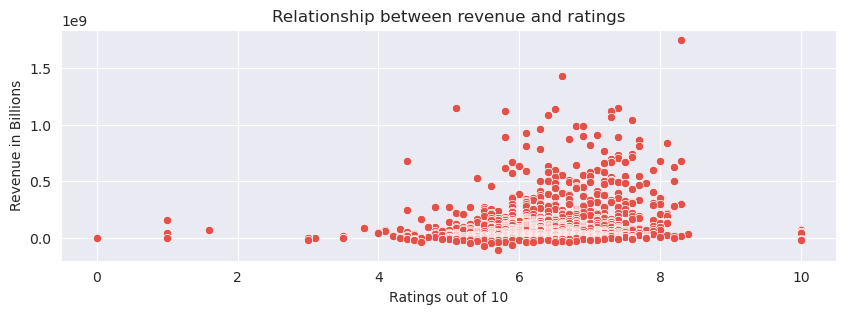

In [1609]:
# scatter plot to show relationship between revenue and ratings.

sns.set_palette("Spectral")
sns.set_style("darkgrid")

plt.subplots(figsize=(10, 3))
sns.scatterplot(x='vote_average', y='revenue', data=movie_ds)
plt.title('Relationship between revenue and ratings')
plt.ylabel('Revenue in Billions')
plt.xlabel('Ratings out of 10');

In [1610]:
# Correlation

movie_ds['vote_average'].corr(movie_ds['revenue'])

0.18557026691575565

The correlation to the revenue and the ratings is higher as compared to the correlation of budget and ratings.  

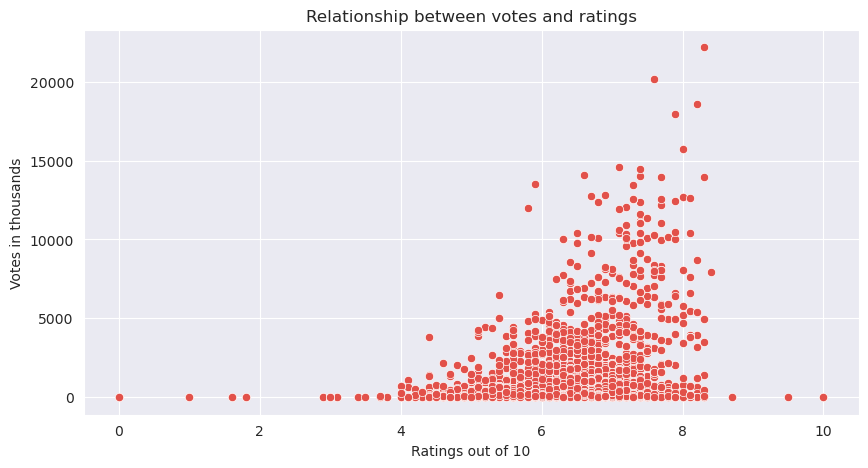

In [1611]:
# scatter plot to show relationship between votes and ratings.

sns.set_palette("Spectral")
sns.set_style("darkgrid")

plt.subplots(figsize=(10, 5))
sns.scatterplot(x='vote_average', y='vote_count', data=movie_ds)
plt.title('Relationship between votes and ratings')
plt.ylabel('Votes in thousands')
plt.xlabel('Ratings out of 10');

In [1612]:
# Correlation

movie_ds['vote_count'].corr(movie_ds['vote_average'])

0.2890060218144024

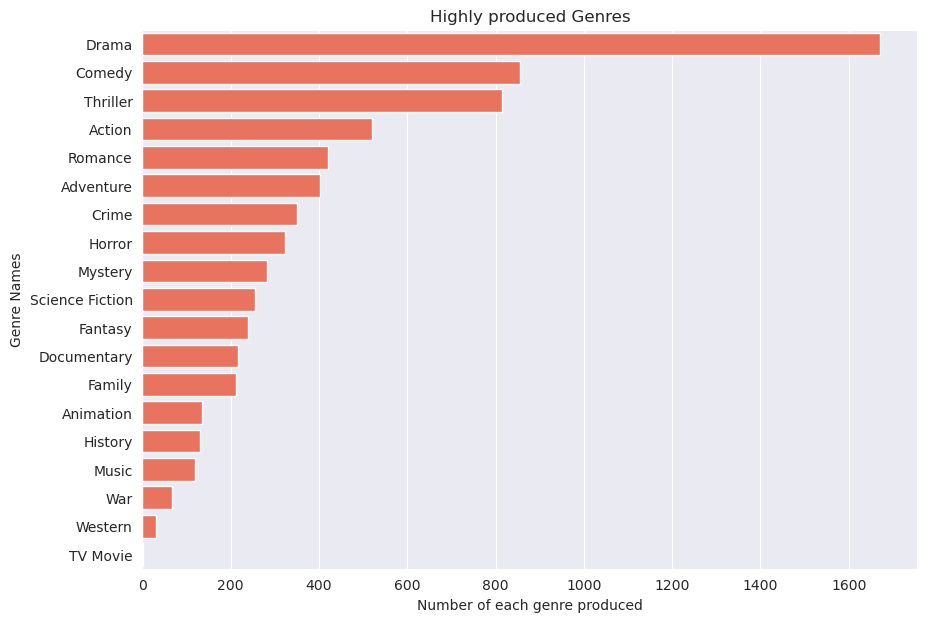

In [1613]:
# Bar chart to show the relationship between genres and their production. 


sns.set_palette("Spectral")
sns.set_style("darkgrid")

plt.subplots(figsize=(10, 7))
sns.barplot(x='movies_produced', 
            y='name', 
            data=genre_prod,
           color='tomato')
plt.title('Top produced Genres')
plt.ylabel('Genre Names')
plt.xlabel('Number of each genre produced');


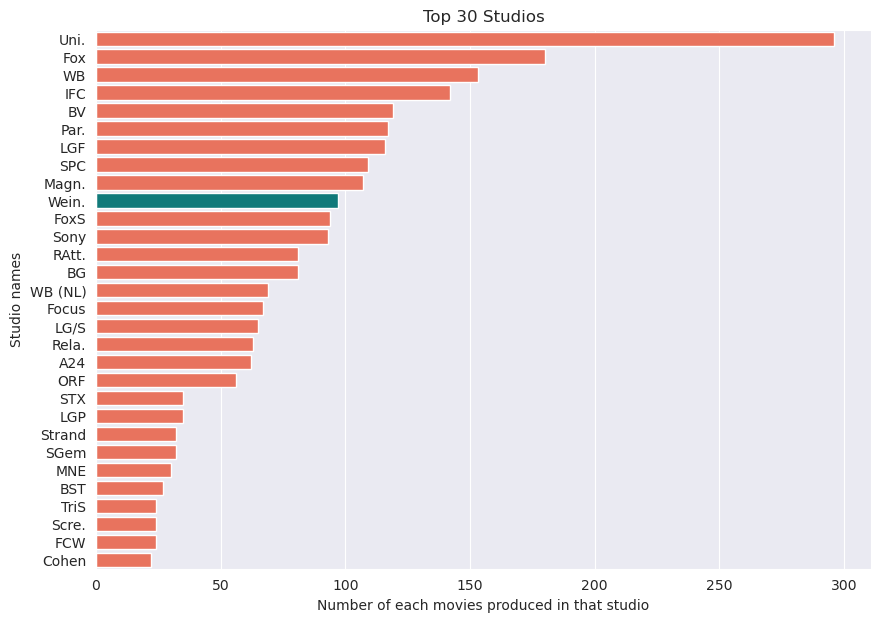

In [1715]:
# Bar chart to show the relationship between studios and their production. 

sns.set_palette("Spectral")
sns.set_style("darkgrid")

cols = ['darkcyan' if (x == 'Wein.') else 'darkcyan' 
        if (x == 'Good Deed') else 'darkcyan' 
        if (x == 'Neon') else 'tomato'
        for x in studio_30['index']]


plt.subplots(figsize=(10, 7))
sns.barplot(y='index', 
            x=0, 
            data=studio_30,
           palette=cols)
plt.title('Top 30 Studios')
plt.ylabel('Studio names')
plt.xlabel('Number of each movies produced in that studio');

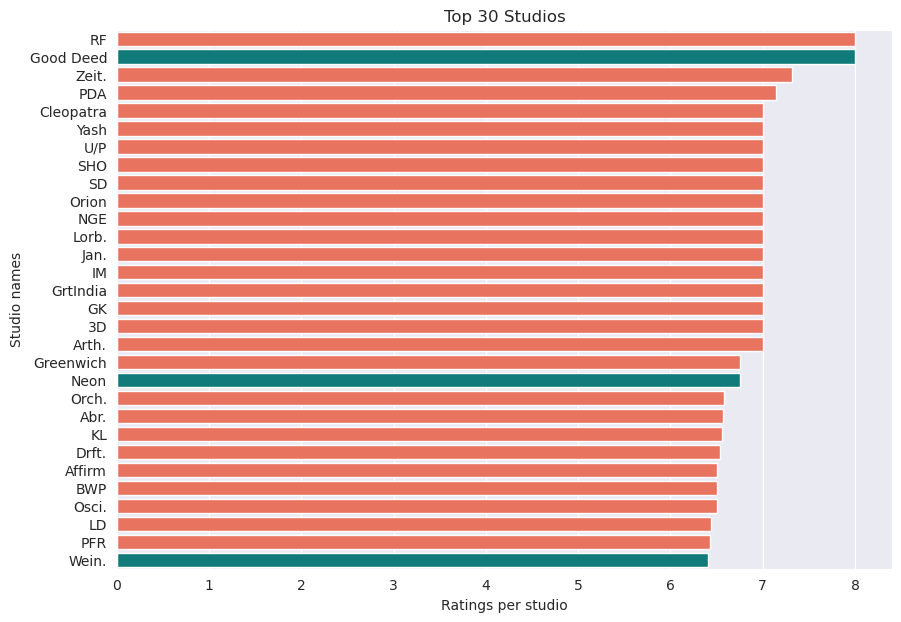

In [1714]:
# Bar chart to show the relationship between studios and their ratings. 

sns.set_palette("Spectral")
sns.set_style("darkgrid")

cols = ['darkcyan' if (x == 'Wein.') else 'darkcyan' 
        if (x == 'Good Deed') else 'darkcyan' 
        if (x == 'Neon') else 'tomato'
        for x in studio_ratings['index']]

plt.subplots(figsize=(10, 7))
sns.barplot(y='index', 
            x=0, 
            data=studio_ratings,
           palette=cols)
plt.title('Top 30 Studios')
plt.ylabel('Studio names')
plt.xlabel('Ratings per studio');

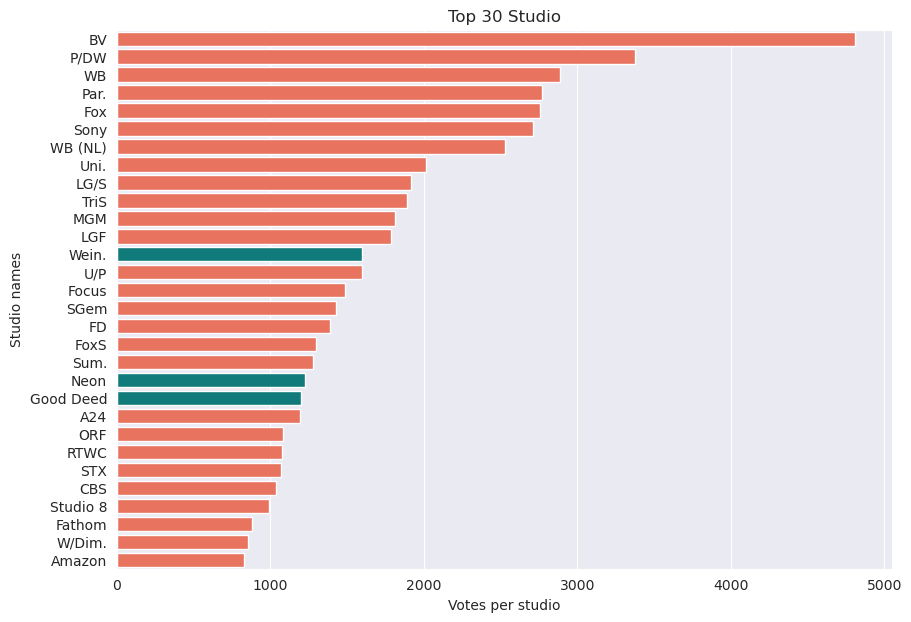

In [1713]:
# Bar chart to show the relationship between studios and the votes cast. 

sns.set_palette("Spectral")
sns.set_style("darkgrid")

cols = ['darkcyan' if (x == 'Wein.') else 'darkcyan' 
        if (x == 'Good Deed') else 'darkcyan' 
        if (x == 'Neon') else 'tomato'
        for x in studio_votes['index']]


plt.subplots(figsize=(10, 7))
sns.barplot(y='index', 
            x=0, 
            data=studio_votes,
           palette=cols)
plt.title('Top 30 Studio')
plt.ylabel('Studio names')
plt.xlabel('Votes per studio');

In [1629]:
# Getting the correlation between the revenue and the different genres. 

split_genre_df[split_genre_df.columns[18:]].corr()['revenue'][:].sort_values(ascending=False).to_frame()


,revenue
revenue,1.000000
Adventure,0.401686
Animation,0.263716
Sci-Fi,0.220068
Action,0.189644
Fantasy,0.058904
Sport,0.041138
Comedy,0.032537
NaN,0.029440
Family,0.011696


## 5. Conclusion


From the data above we have made the following inferences;

* Adventure, animation, Sci-FI and action have the highest correlation with revenue, hence the most revenue is gotten from their production.
* Studio's producing the most movies do not necessarily get the highest ratings.
* The is little to no correlation to the budget and ratings, but the correlation is higher between the ratings and the revenue.
* Neon, Wein. and Good Deed are the only studios with movies that have votes over 1000 and ratings over 6.
* Wein. is the only studio with almost 100 movie productions that are rated highly.


## 6. Recommendation

* The company should start with the producuction adventure, animation and Sci-Fi movies as those make the highest revenue.
* The comapany should work with or build the structure to emulate Wein. and Neon studio as it seems to have done well with the movies produced. 
